# explore_met_csv_data

## Purpose:
Initial exploration of the met station data saved in [data_gov_sg_met_v1/](https://github.com/grandey/access-data-gov-sg/tree/master/data_gov_sg_met_v1).

## History:
- 2017-06 - Benjamin S. Grandey

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Read data for single variable and month

In [2]:
df = pd.read_csv('data_gov_sg_met_v1/wind-direction_2016_12_c20170530.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803989 entries, 0 to 803988
Data columns (total 3 columns):
station_id       803989 non-null object
value            803989 non-null int64
timestamp_sgt    803989 non-null object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [3]:
df['timestamp_sgt'] = df['timestamp_sgt'].astype('datetime64[ns]')  # convert to datetime64 type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803989 entries, 0 to 803988
Data columns (total 3 columns):
station_id       803989 non-null object
value            803989 non-null int64
timestamp_sgt    803989 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.4+ MB


In [4]:
df.head()

,station_id,value,timestamp_sgt
0,S109,275,2016-12-01 23:43:59
1,S117,331,2016-12-01 23:43:59
2,S50,325,2016-12-01 23:43:59
3,S107,315,2016-12-01 23:43:59
4,S43,315,2016-12-01 23:43:59


In [5]:
df.tail()

,station_id,value,timestamp_sgt
803984,S24B,338,2016-12-31 23:59:59
803985,S24,346,2016-12-31 23:59:59
803986,S116,44,2016-12-31 23:59:59
803987,S104,8,2016-12-31 23:59:59
803988,S100,55,2016-12-31 23:59:59


## Read data across multiple variables and months

In [6]:
# Read data for each variable and store in dictionary
df_dict = {}  # dictionary in which to store DataFrames
for variable in ['rainfall', 'wind-speed', 'wind-direction']:
    df = pd.DataFrame()  # initialise df as an empty DataFrame
    filenames = glob('data_gov_sg_met_v1/{}_*.csv.gz'.format(variable))
    for filename in filenames:
        temp_df = pd.read_csv(filename)  # read data from file
        temp_df = temp_df.rename(columns={'value': variable})  # rename 'value' column
        temp_df['timestamp_sgt'] = temp_df['timestamp_sgt'].astype('datetime64[ns]')  # convert to datetime64
        df = df.append(temp_df, ignore_index=True)  # append to df
        print('Read {}'.format(filename))
    df_dict[variable] = df  # store df in dictionary

Read data_gov_sg_met_v1/rainfall_2016_12_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_01_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_02_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_03_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_04_c20170529.csv.gz
Read data_gov_sg_met_v1/rainfall_2017_05_c20170602.csv.gz
Read data_gov_sg_met_v1/wind-speed_2016_12_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_01_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_02_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_03_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_04_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-speed_2017_05_c20170602.csv.gz
Read data_gov_sg_met_v1/wind-direction_2016_12_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_01_c20170530.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_02_c20170531.csv.gz
Read data_gov_sg_met_v1/wind-direction_2017_03_c20170531.csv.gz
Read data_gov_sg_met_v1/wind-directi

In [7]:
# Union across the different variables
outer_df = df_dict['rainfall']  # initialise with rainfall data
for variable in ['wind-speed', 'wind-direction']:
    outer_df = outer_df.merge(df_dict[variable], how='outer', on=['station_id', 'timestamp_sgt'])
outer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6316331 entries, 0 to 6316330
Data columns (total 5 columns):
station_id        object
rainfall          float64
timestamp_sgt     datetime64[ns]
wind-speed        float64
wind-direction    float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 289.1+ MB


In [8]:
outer_df.head()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
0,S77,0.0,2016-12-02 21:49:59,NaN,NaN
1,S109,0.0,2016-12-02 21:49:59,NaN,236.0
2,S117,0.0,2016-12-02 21:49:59,NaN,245.0
3,S55,0.0,2016-12-02 21:49:59,NaN,NaN
4,S64,0.0,2016-12-02 21:49:59,NaN,NaN


In [9]:
outer_df.tail()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
6316326,S24B,NaN,2017-01-06 03:56:59,NaN,24.0
6316327,S24,NaN,2017-01-06 03:56:59,NaN,34.0
6316328,S116,NaN,2017-01-06 03:56:59,NaN,32.0
6316329,S104,NaN,2017-01-06 03:56:59,NaN,28.0
6316330,S100,NaN,2017-01-06 03:56:59,NaN,44.0


In [10]:
# Intersection across the different variables
inner_df = df_dict['rainfall']  # initialise with rainfall data
for variable in ['wind-speed', 'wind-direction']:
    inner_df = inner_df.merge(df_dict[variable], how='inner', on=['station_id', 'timestamp_sgt'])
inner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840131 entries, 0 to 840130
Data columns (total 5 columns):
station_id        840131 non-null object
rainfall          840131 non-null float64
timestamp_sgt     840131 non-null datetime64[ns]
wind-speed        840131 non-null float64
wind-direction    840130 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 38.5+ MB


In [11]:
inner_df.head()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
0,S109,0.0,2016-12-08 11:04:59,2.8,327.0
1,S117,0.0,2016-12-08 11:04:59,4.5,327.0
2,S50,0.0,2016-12-08 11:04:59,2.6,330.0
3,S107,0.0,2016-12-08 11:04:59,4.2,343.0
4,S43,0.0,2016-12-08 11:04:59,3.3,26.0


In [12]:
inner_df.tail()

,station_id,rainfall,timestamp_sgt,wind-speed,wind-direction
840126,S115,0.0,2017-05-31 23:55:00,14.2,263.0
840127,S24,0.6,2017-05-31 23:55:00,2.3,11.0
840128,S116,0.0,2017-05-31 23:55:00,15.2,234.0
840129,S104,0.2,2017-05-31 23:55:00,9.7,223.0
840130,S100,0.2,2017-05-31 23:55:00,2.7,179.0


## Summary statistics by station

In [13]:
outer_df.groupby('station_id').describe(percentiles=[0.5,]).sort_index()

rainfall                                     wind-direction  \
              count      mean       std  min  50%   max          count   
station_id                                                               
S06         32967.0  0.026608  0.269262  0.0  0.0  10.0       164822.0   
S07         50171.0  0.028507  0.299398  0.0  0.0  13.0            0.0   
S08         47210.0  0.026316  0.287001  0.0  0.0  13.8            0.0   
S100        49811.0  0.022184  0.230294  0.0  0.0   8.4       259082.0   
S101        51052.0  0.024293  0.252744  0.0  0.0   9.8            0.0   
S102        45169.0  0.016587  0.207026  0.0  0.0   9.4       227872.0   
S103          488.0  0.000000  0.000000  0.0  0.0   0.0            0.0   
S104        48783.0  0.024611  0.251860  0.0  0.0   8.6       246014.0   
S106        45817.0  0.022869  0.239299  0.0  0.0  12.0       228853.0   
S107        48012.0  0.023432  0.243149  0.0  0.0   8.4       249110.0   
S108        45574.0  0.023417  0.246659  0.0  0.0  10.0       200936.0   
S109        49096.0  0.026829  0.280169  0.0  0.0  11.4       259218.0   
S11         51118.0  0.022008  0.260217  0.0  0.0  10.6            0.0   
S110        36037.0  0.023570  0.256825  0.0  0.0  11.0            0.0   
S112        50093.0  0.016773  0.227897  0.0  0.0  13.8            0.0   
S113        50822.0  0.024682  0.258446  0.0  0.0  11.0            0.0   
S114        50035.0  0.027757  0.287174  0.0  0.0   9.8            0.0   
S115        49981.0  0.022108  0.255858  0.0  0.0  11.6       251977.0   
S116        51368.0  0.020199  0.212583  0.0  0.0   7.2       258882.0   
S117        51388.0  0.023079  0.252752  0.0  0.0   9.2       257947.0   
S118        44844.0  0.027116  0.284327  0.0  0.0  10.6            0.0   
S119        50535.0  0.025586  0.267295  0.0  0.0   9.4            0.0   
S120        50379.0  0.025634  0.268720  0.0  0.0   9.8            0.0   
S121        41827.0  0.026189  0.268109  0.0  0.0   9.0       187242.0   
S122        50302.0  0.020441  0.223591  0.0  0.0  10.8       256917.0   
S123        51363.0  0.026295  0.272892  0.0  0.0  11.6            0.0   
S24         49378.0  0.022779  0.243486  0.0  0.0  11.2       255877.0   
S24B        41114.0  0.000000  0.000000  0.0  0.0   0.0       204101.0   
S29         50235.0  0.021694  0.241991  0.0  0.0   9.4            0.0   
S33         50032.0  0.025328  0.291895  0.0  0.0  14.2            0.0   
S35         51432.0  0.024580  0.256840  0.0  0.0  10.4            0.0   
S36         38543.0  0.029053  0.295388  0.0  0.0  10.4            0.0   
S40         50423.0  0.026643  0.286053  0.0  0.0  13.8            0.0   
S43         49942.0  0.030992  0.309149  0.0  0.0  12.4       259436.0   
S44         45703.0  0.020821  0.226201  0.0  0.0  12.4       239486.0   
S46         51139.0  0.025671  0.268848  0.0  0.0  11.2            0.0   
S50         48961.0  0.026707  0.271137  0.0  0.0  10.6       246109.0   
S55         51373.0  0.025461  0.266920  0.0  0.0  13.4            0.0   
S60         13618.0  0.017389  0.229889  0.0  0.0   7.6        20866.0   
S61         51423.0  0.028057  0.291919  0.0  0.0  12.0            0.0   
S63         47518.0  0.020893  0.232794  0.0  0.0   9.4            0.0   
S64         51495.0  0.027047  0.281797  0.0  0.0  12.2            0.0   
S66         51227.0  0.023351  0.263986  0.0  0.0  13.0            0.0   
S69         43758.0  0.025577  0.284503  0.0  0.0  11.0            0.0   
S71         45459.0  0.021114  0.245801  0.0  0.0  10.2            0.0   
S72            33.0  0.000000  0.000000  0.0  0.0   0.0            0.0   
S77         51225.0  0.023168  0.240913  0.0  0.0  11.6            0.0   
S78         50763.0  0.025333  0.256613  0.0  0.0   9.8            0.0   
S79         51251.0  0.024483  0.267580  0.0  0.0  10.4            0.0   
S81         50642.0  0.026733  0.289601  0.0  0.0  12.6            0.0   
S84         50312.0  0.022981  0.263504  0.0  0.0  14.0            0.0   
S88         495

## Violinplots of distribution of wind-speed and rainfall for stations with wind data

In [14]:
# Get index of stations with no wind-speed data
temp_df = outer_df.groupby('station_id')['wind-speed'].count()  # number of data points per station
temp_df = temp_df[temp_df == 0]  # select stations with no data
no_wind_stations = list(temp_df.index)
# Drop stations with no wind-speed data
temp_df = outer_df.set_index('station_id')
has_wind_df = temp_df.drop(no_wind_stations).sort_index()

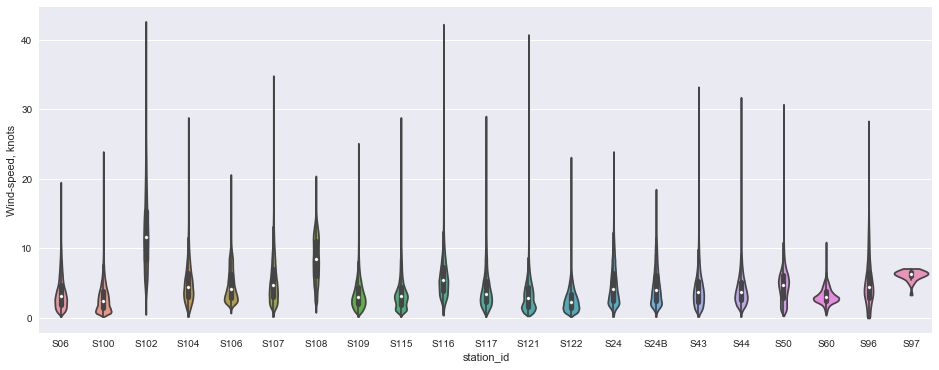

In [15]:
# Wind-speed
fig, ax = plt.subplots(figsize=(16, 6))
sns.violinplot(x=has_wind_df.index, y=has_wind_df['wind-speed'], cut=0, ax=ax)
ax.set_ylabel('Wind-speed, knots')

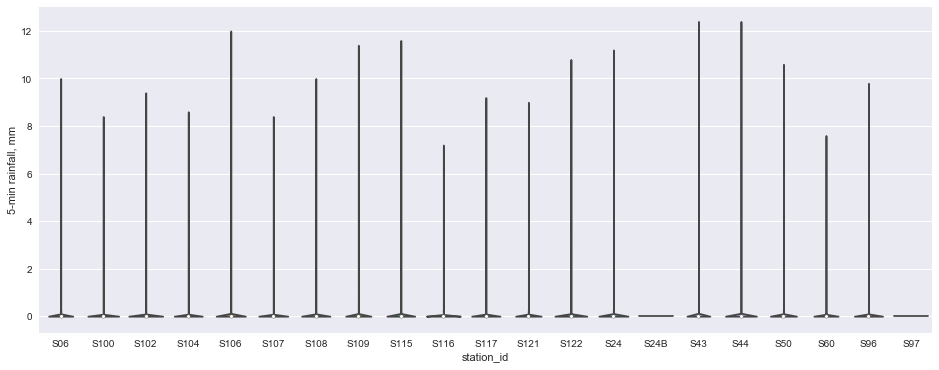

In [16]:
# Rainfall
fig, ax = plt.subplots(figsize=(16, 6))
sns.violinplot(x=has_wind_df.index, y=has_wind_df['rainfall'], cut=0, ax=ax)
ax.set_ylabel('5-min rainfall, mm')

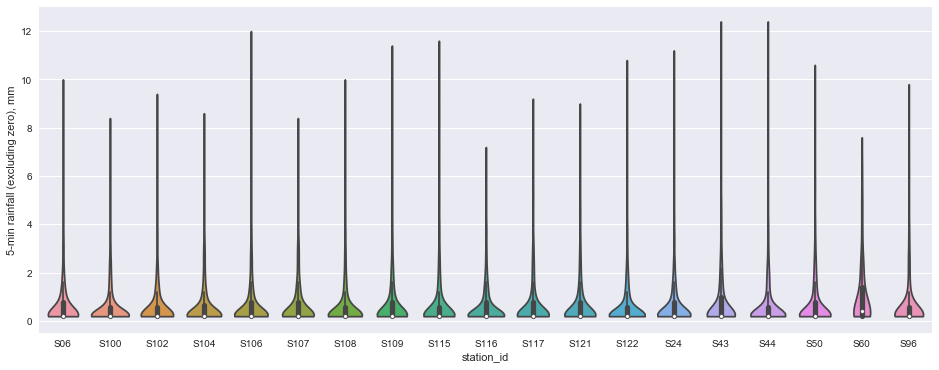

In [17]:
# Rainfall - excluding zero
fig, ax = plt.subplots(figsize=(16, 6))
temp_df = has_wind_df[has_wind_df['rainfall'] > 0]
sns.violinplot(x=temp_df.index, y=temp_df['rainfall'], cut=0, ax=ax)
ax.set_ylabel('5-min rainfall (excluding zero), mm')

## Plot timeseries for a specific station

In [18]:
# Select data for station S06, and index by timestamp_sgt
s06_df = outer_df[outer_df['station_id'] == 'S06'].set_index('timestamp_sgt')

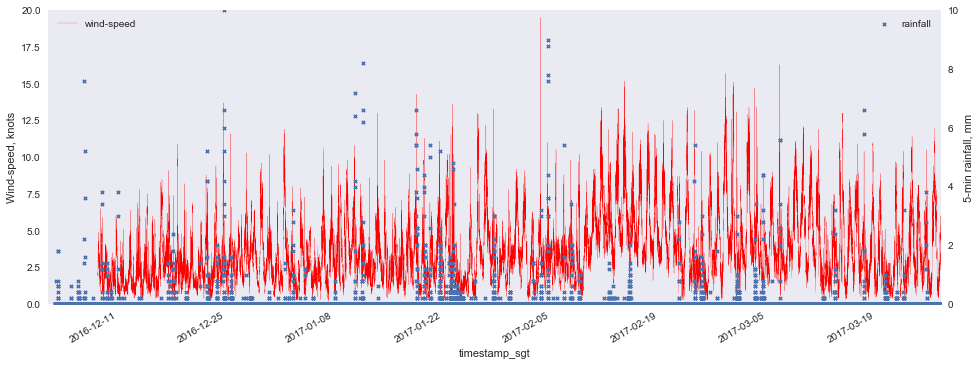

In [19]:
# Prepare axes
fig, ax = plt.subplots(figsize=(16, 6))
ax1 = ax.twinx()
# Left axis - windspeed timeseries
s06_df.plot(y='wind-speed', linewidth=0.2, c='r', ax=ax)
ax.legend(loc=2)
ax.set_ylabel('Wind-speed, knots')
ax.set_ylim([0, 20])
ax.grid(False)
# Right axis - rainfall timeseries scatter
ax1.scatter(x=s06_df.index, y=s06_df['rainfall'], marker='x', s=10)
ax1.legend(loc=1)
ax1.set_ylabel('5-min rainfall, mm')
ax1.set_ylim([0, 10])
ax1.grid(False)

## Wind-speed vs rainfall for a specific station

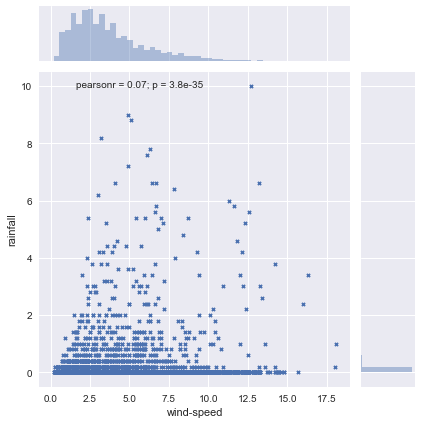

In [20]:
# Quick look at relationship between wind-speed and rainfall for one station
sns.jointplot(s06_df['wind-speed'], s06_df['rainfall'], kind='scatter', dropna=True,
              marker='x', s=10)

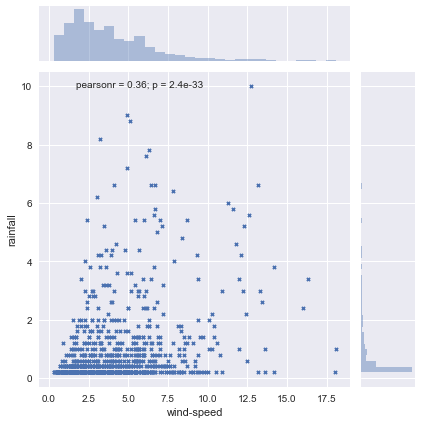

In [21]:
# What happens if times with zero rain are excluded?
s06_has_rainfall = s06_df[s06_df['rainfall'] > 0]
sns.jointplot(s06_has_rainfall['wind-speed'], s06_has_rainfall['rainfall'], kind='scatter', dropna=True,
              marker='x', s=10)